In this homework, we will use the California Housing Prices from Kaggle.

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

## Preparing the dataset

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Preparation:

- Fill missing values with zeros.
- Apply the log transform to median_house_value.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [109]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [32]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/6. Decision Trees and Ensemble Learning/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
df = df.query("ocean_proximity == '<1H OCEAN' or ocean_proximity == 'INLAND'")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


#### Fill missing values with zeros

In [35]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
df['total_bedrooms'] = df.total_bedrooms.fillna(0)

In [37]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Apply the log transform to median_house_value

<Axes: xlabel='median_house_value', ylabel='Count'>

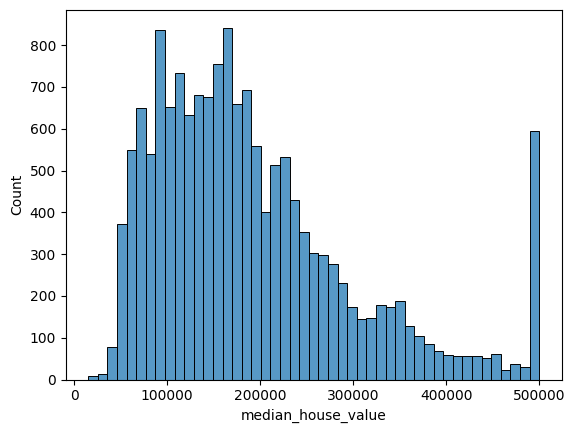

In [38]:
sns.histplot(df['median_house_value'])

#### Do train/validation/test split with 60%/20%/20% distribution

In [46]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [48]:
len(df_train), len(df_val) + len(df_test)

(9411, 6276)

#### Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


In [49]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the median_house_value variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

- ocean_proximity
- total_rooms
- latitude
- population

In [50]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [51]:
y_pred = dt.predict(X_val)

In [52]:
dt.decision_path(X_train)

<9411x3 sparse matrix of type '<class 'numpy.int64'>'
	with 18822 stored elements in Compressed Sparse Row format>

In [53]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



/home/timur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Answer: 
- ocean_proximity

## Question 2

Train a random forest model with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

- 0.045
- 0.245
- 0.545
- 0.845

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [55]:
parameters = {
    'n_estimators':10,
    'random_state':1,
    'n_jobs':-1
}

In [56]:
rf = RandomForestRegressor(**parameters)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [57]:
y_pred = rf.predict(X_val)
RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
RMSE

0.2449529003059715

## Answer: 

- 0.245

## Question 3

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160

In [58]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, rmse))

In [71]:
scores

[(10, 0.24495290030597147),
 (20, 0.238333589873668),
 (30, 0.23650402956159838),
 (40, 0.23509490973460043),
 (50, 0.23475019819586201),
 (60, 0.2345062010902977),
 (70, 0.23440154550608353),
 (80, 0.23457219159286974),
 (90, 0.23447044062017394),
 (100, 0.23428380626857082),
 (110, 0.23421064634979386),
 (120, 0.23402229395554794),
 (130, 0.2338243957678853),
 (140, 0.2336636643354058),
 (150, 0.2335480207820043),
 (160, 0.23342267954173773),
 (170, 0.23338695822923008),
 (180, 0.23356148302077015),
 (190, 0.23380601278831947),
 (200, 0.23370275895578776)]

In [80]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse']).sort_values('rmse')
df_scores['rmse'] = df_scores.rmse.round(3)
df_scores

,n_estimators,rmse
16,170,0.233
15,160,0.233
14,150,0.234
17,180,0.234
13,140,0.234
19,200,0.234
18,190,0.234
12,130,0.234
11,120,0.234
10,110,0.234


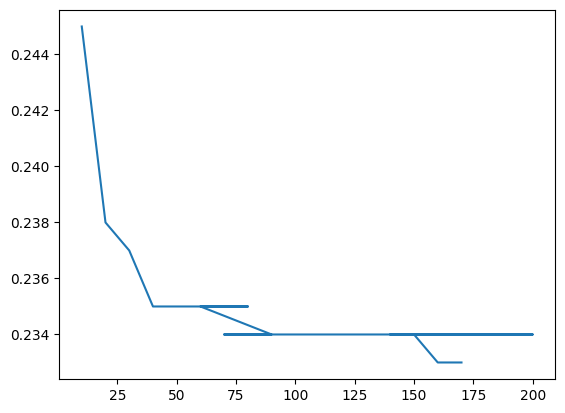

In [78]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

- After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

## Answer: 
- 160

## Question 4

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE

- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25

In [83]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=1, n_jobs=-1)
        
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))

In [87]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.250682
1,10,20,0.247455
2,10,30,0.246264
3,10,40,0.245029
4,10,50,0.245430
...,...,...,...
75,25,160,0.233395
76,25,170,0.233390
77,25,180,0.233572
78,25,190,0.233811


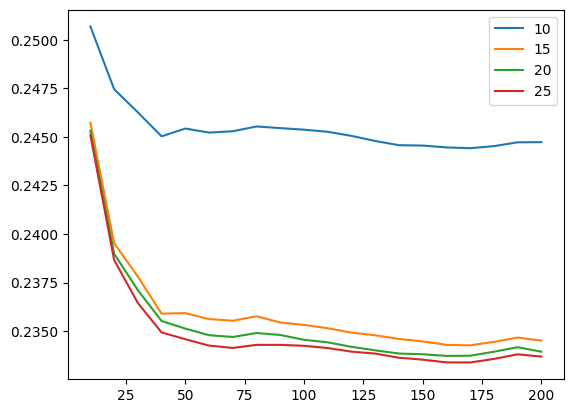

In [88]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()
plt.show()
     

- What's the best max_depth, using the mean RMSE?

## Answer: 

- 25

## Question 5


We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
    - n_estimators=10,
    - max_depth=20,
    - random_state=1,
    - n_jobs=-1 (optional)

- Get the feature importance information from this model

What's the most important feature (among these 4)?

- total_rooms
- median_income
- total_bedrooms
- longitude

Train the model

In [91]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

Feature importance

In [92]:
rf.feature_importances_

array([0.01495348, 0.03019435, 0.10189142, 0.0861758 , 0.33566849,
       0.29247297, 0.07380644, 0.02682069, 0.01624481, 0.02177155])

In [99]:
df_ft_importance = pd.DataFrame()
df_ft_importance['feature'] = dv.feature_names_
df_ft_importance['importance'] = rf.feature_importances_
df_ft_importance = df_ft_importance.sort_values('importance', ascending=False)

In [100]:
df_ft_importance

,feature,importance
4,median_income,0.335668
5,ocean_proximity=<1H OCEAN,0.292473
2,latitude,0.101891
3,longitude,0.086176
6,ocean_proximity=INLAND,0.073806
1,housing_median_age,0.030194
7,population,0.026821
9,total_rooms,0.021772
8,total_bedrooms,0.016245
0,households,0.014953


- What's the most important feature

## Answer: 
- median_income

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

In [23]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both give equal value

In [101]:
import xgboost as xgb

DMatrix

In [106]:
dv.get_feature_names()

/home/timur/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [112]:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [113]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [114]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results
     

In [115]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [116]:
scores['eta=0.3'] = parse_xgb_output(output)

In [117]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [118]:
scores['eta=0.1'] = parse_xgb_output(output)

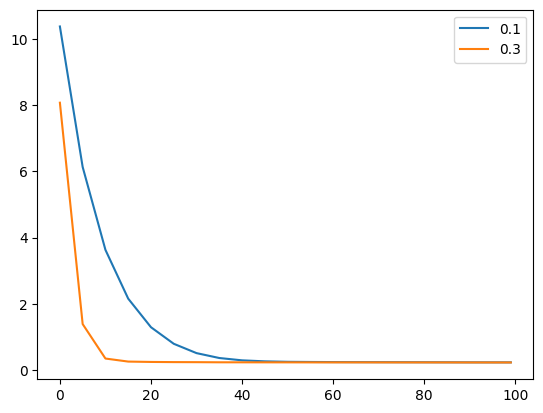

In [119]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()

## Answer: 

- Both give equal value